In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [8]:
df = pd.read_csv('global.csv')
df

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_gwh_2018,generation_gwh_2019,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,2019.0,NaN,617.789264,843.747000,886.004428,663.774500,626.239128,NaN,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,2019.0,NaN,3035.550000,5916.370000,6243.000000,5385.579736,7279.000000,NaN,Central Electricity Authority,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,2019.0,NaN,NaN,0.994875,233.596650,865.400000,686.500000,NaN,Central Electricity Authority,NaN
903,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_gwh_2018',
       'generation_gwh_2019', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

# Data Preparation & Cleaning

In [11]:
df.info

<bound method DataFrame.info of     country country_long                          name   gppd_idnr  \
0       IND        India              ACME Solar Tower  WRI1020239   
1       IND        India           ADITYA CEMENT WORKS  WRI1019881   
2       IND        India      AES Saurashtra Windfarms  WRI1026669   
3       IND        India                   AGARTALA GT  IND0000001   
4       IND        India                  AKALTARA TPP  IND0000002   
..      ...          ...                           ...         ...   
902     IND        India                  YERMARUS TPP  IND0000513   
903     IND        India  Yelesandra Solar Power Plant  WRI1026222   
904     IND        India  Yelisirur wind power project  WRI1026776   
905     IND        India                   ZAWAR MINES  WRI1019901   
906     IND        India       iEnergy Theni Wind Farm  WRI1026761   

     capacity_mw  latitude  longitude primary_fuel other_fuel1 other_fuel2  \
0            2.5   28.1839    73.2407        Sola

In [13]:
selected_column = [
    'country',
    'country_long',
    'name',
    'capacity_mw',
    'primary_fuel',
    'other_fuel1',
    'other_fuel2',
    'other_fuel3',
    'commissioning_year',
    'year_of_capacity_data',
    'generation_gwh_2013',
    'generation_gwh_2014',
    'generation_gwh_2015',
    'generation_gwh_2016',
    'generation_gwh_2017',
    'estimated_generation_gwh'
]

In [14]:
len(selected_column)

16

In [15]:
df = df[selected_column].copy()

In [16]:
df.sample(5)


,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
536,IND,India,NIMBAHERA JK CEMENT,33.2,Coal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
805,IND,India,THIROT,4.5,Hydro,NaN,NaN,NaN,1995.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN
853,IND,India,UPPER KOLAB,320.0,Hydro,NaN,NaN,NaN,1990.0,2019.0,NaN,730.8076,763.23465,616.2433,703.33565,NaN
174,IND,India,DHOLPUR,330.0,Gas,NaN,NaN,NaN,2007.0,2019.0,NaN,829.1142,282.70000,94.8550,210.23050,NaN
219,IND,India,GANDHARBAL,15.0,Hydro,NaN,NaN,NaN,1959.0,2019.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
df.describe()

,capacity_mw,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,907.000000,0.0,527.000000,519.0,0.0,398.000000,422.000000,434.000000,440.000000,0.0
mean,326.223755,NaN,1997.091082,2019.0,NaN,2431.823590,2428.226946,2467.936859,2547.759305,NaN
std,590.085456,NaN,17.082868,0.0,NaN,4026.440035,4194.596959,4162.884308,4196.991169,NaN
min,0.000000,NaN,1927.000000,2019.0,NaN,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.725000,NaN,1988.000000,2019.0,NaN,223.557672,176.381062,188.285252,177.874930,NaN
50%,59.200000,NaN,2001.000000,2019.0,NaN,801.123775,711.181225,737.205450,817.977250,NaN
75%,385.250000,NaN,2012.000000,2019.0,NaN,3035.306250,3084.121250,3282.861313,3275.690475,NaN
max,4760.000000,NaN,2018.000000,2019.0,NaN,28127.000000,30539.000000,30015.000000,35116.000000,NaN


In [20]:
df[df.generation_gwh_2013 == 2428.226946	]

,country,country_long,name,capacity_mw,primary_fuel,other_fuel1,other_fuel2,other_fuel3,commissioning_year,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh


# Exploratory Analysis and Visualization

In [21]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12, 8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
df.country_long.nunique()

1

In [23]:
countries_plant = df.country_long.value_counts().head(20)
countries_plant

India    907
Name: country_long, dtype: int64

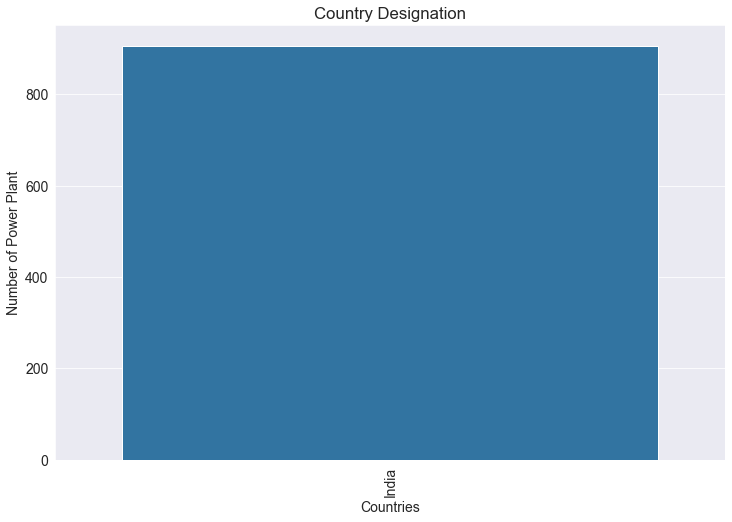

In [24]:
sns.barplot(x = countries_plant.index, y = countries_plant)
plt.xticks(rotation = 90)
plt.title('Country Designation')
plt.ylabel('Number of Power Plant')
plt.xlabel('Countries');

In [25]:
main_primary_fuel = df.primary_fuel.value_counts() * 100 / df.primary_fuel.count()
main_primary_fuel

Coal       28.445424
Hydro      27.673649
Solar      14.002205
Wind       13.561191
Gas         7.607497
Biomass     5.512679
Oil         2.205072
Nuclear     0.992282
Name: primary_fuel, dtype: float64

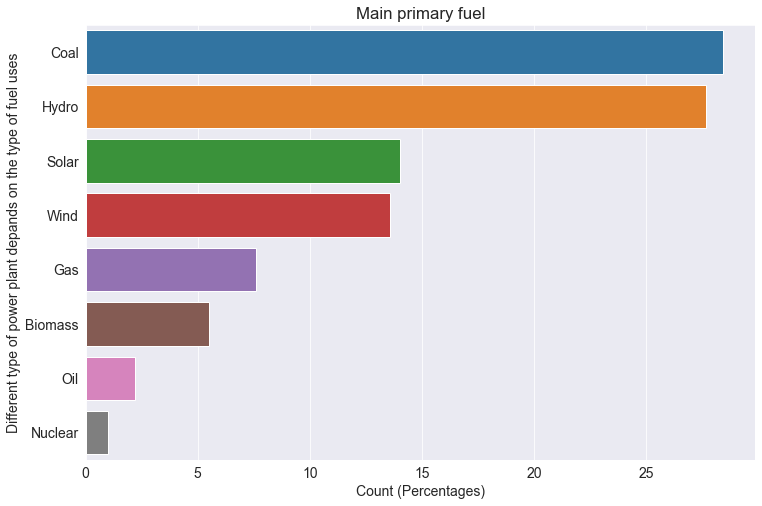

In [26]:
sns.barplot(x = main_primary_fuel, y = main_primary_fuel.index)
plt.title('Main primary fuel')
plt.xlabel('Count (Percentages)');
plt.ylabel('Different type of power plant depands on the type of fuel uses');

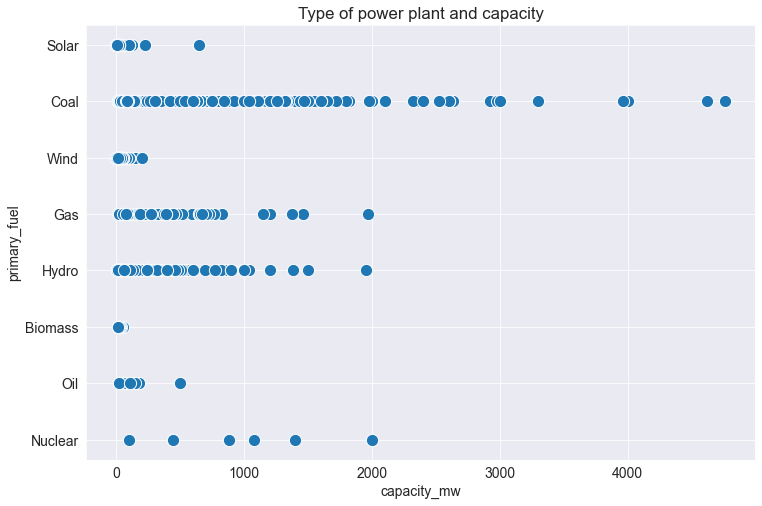

In [27]:
sns.scatterplot(x = df.capacity_mw, y = df.primary_fuel, s = 150)
plt.title('Type of power plant and capacity');

In [28]:
countries_capacity = df.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

,capacity_mw
country_long,
India,295884.946


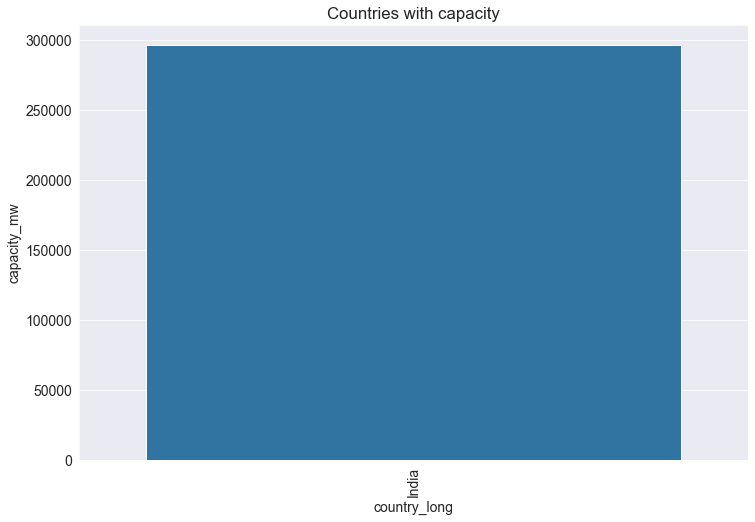

In [29]:
sns.barplot(x = countries_capacity.index, y = countries_capacity.capacity_mw)
plt.xticks(rotation = 90)
plt.title('Countries with capacity');

In [30]:
df.generation_gwh_2013.isna().sum()

907

# Different type of primary fuel based power plant and their year of going to the first operation.

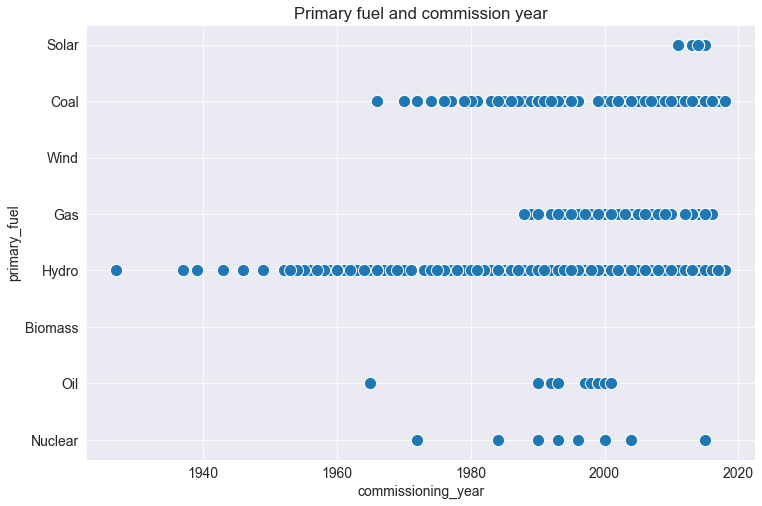

In [40]:
sns.scatterplot(x = df.commissioning_year, y = df.primary_fuel, s = 150);
plt.title('Primary fuel and commission year');

# capacity_mw 

In [43]:
countries_capacity =df.groupby('country_long')[['capacity_mw']].sum().sort_values('capacity_mw', ascending = False).head(20)
countries_capacity

,capacity_mw
country_long,
India,295884.946
